In [19]:
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
import numpy as np



df = pd.concat([
    pd.read_csv(i) for i in Path(".").glob("001_*.csv")
]).reset_index(drop=True).drop(columns="Unnamed: 0")



from sklearn.model_selection import train_test_split
import numpy as np
train_target_size = 705
train, devtest = train_test_split(df, train_size=train_target_size,random_state=20, stratify=df.target)

for i in range(10):
    problematic_speakers = set(train.speaker_id.tolist()).intersection(set(devtest.speaker_id.tolist()))

    for speaker in problematic_speakers:
        # print(test.shape[0], dev.shape[0])
        if train.shape[0] > train_target_size:
            # Move speakers from test to dev
            c = train.speaker_id == speaker
            to_move = train[c]
            train = train[~c].reset_index(drop=True)
            devtest = pd.concat([to_move, devtest]).reset_index(drop=True)
        else:
            c = devtest.speaker_id == speaker
            to_move = devtest[c]
            devtest = devtest[~c].reset_index(drop=True)
            train = pd.concat([to_move, train]).reset_index(drop=True)
        
train.shape

(702, 13)

In [20]:
i = 0
for speaker in problematic_speakers:
    if (speaker in train.speaker_id) and (speaker in devtest.speaker_id):
        print(f"Speaker {speaker} found in both splits!")
        i += 1
i

0

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np
test_target_size = 102
test, dev = train_test_split(devtest, test_size=test_target_size, random_state=45, stratify=devtest.target)

for i in range(20):
    problematic_speakers = set(test.speaker_id.tolist()).intersection(set(dev.speaker_id.tolist()))
    speaker_gb = test[test.speaker_id.isin(problematic_speakers)].groupby("speaker_id").count()["utterance_id"]
    speaker_gb = speaker_gb.sort_values(ascending=False)
    problematic_speakers = speaker_gb.index
    for speaker in problematic_speakers:
        # print(test.shape[0], dev.shape[0])
        if test.shape[0] > test_target_size:
            # Move speakers from test to dev
            c = test.speaker_id == speaker
            to_move = test[c]
            test = test[~c].reset_index(drop=True)
            dev = pd.concat([to_move, dev]).reset_index(drop=True)
        else:
            c = dev.speaker_id == speaker
            to_move = dev[c]
            dev = dev[~c].reset_index(drop=True)
            test = pd.concat([to_move, test]).reset_index(drop=True)
test.shape

(103, 13)

In [22]:
i = 0
for speaker in problematic_speakers:
    if (speaker in test.speaker_id) and (speaker in dev.speaker_id):
        print(f"Speaker {speaker} found in both splits!")
        i += 1
i

0

In [23]:
test["split"] = "test"
dev["split"] = "dev"
train["split"] = "train"

df = pd.concat([train, dev, test]).reset_index(drop=True)

<AxesSubplot:xlabel='split', ylabel='speaker_id'>

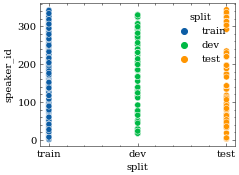

In [24]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'no-latex'])
import seaborn as sns

sns.scatterplot(data=df, x="split", y="speaker_id", hue="split")

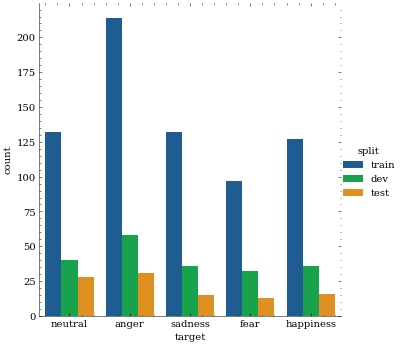

In [25]:
sns.catplot(data=df, x="target", hue="split", kind="count")

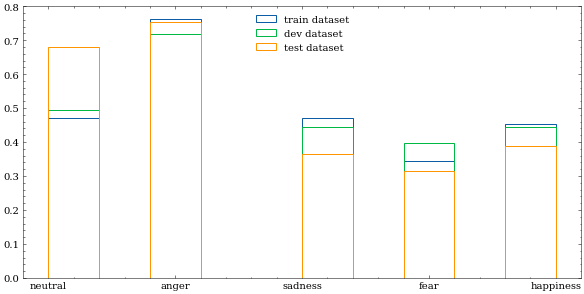

In [26]:
plt.figure(figsize=(10,5))
plt.hist(train.target, label="train dataset", density=True, histtype="step")
plt.hist(dev.target, label="dev dataset", density=True, histtype="step")
plt.hist(test.target, label="test dataset", density=True, histtype="step")
plt.legend(loc="upper center")
plt.show()

In [27]:
dev.to_csv("007_dev.csv")
test.to_csv("007_test.csv")
train.to_csv("007_train.csv")

